In [ ]:
# Regex expressions:

# \[\[([\w\s]+)\|[\w\s]+\]\] gives first term when structure is [[Full name|nickname]]
# \[\[([\w\s]+)\]\] gives first term when structure is [[Full name]]
# \[\[([\w\s]+\([\w\s]+'[\w\s]+\))\|[\w\s]+\]\] gives first term when structure is [[Full name (relation with ')|name]]
# \[\[([\w\s]+\([\w\s]+[\w\s]+\))\|[\w\s]+\]\] gives first term when structure is [[Full name (relation)|name]]

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import re

In [ ]:
df_characters = pd.read_csv("/work/socialgraph-witcher-analysis/data/characters.csv")
df_characters.head()

,pageid,title
0,8046,Innkeeper
1,5069,The Witcher journal character entries
2,2478,Abigail
3,53882,Adalbert (soldier)
4,2210,Adam (Murky Waters)


In [ ]:
# Race = \[\[(.+)\]\]
# Gender = (\w+)
# Nationality = \{\{(.+)\}\}
# Family = \[\[(.+)\]\]
# Profession = \[\[\w+\]\]\<\w+\>\[\[(.+)\|.+\]\] #To match Ciri
# Profession = \[\[(\w+)\]\] #First profession
# Profession = \[\[(\w+)\]\]\<\w+\>\[\[(\w+)\]\] #Second prof if first is link
# Profession = \w+\<\w+\>\[\[(\w+)\]\] # Second prof if first is not link
# Profession = (\w+) #First prof if it is not a link

# matchRace = re.findall(r'Race = \[\[(.+)\]\]', text, re.IGNORECASE)
# matchGender = re.findall(r'Gender = (\w+)', text, re.IGNORECASE)
# matchNatio = re.findall(r'Nationality = \{\{(.+)\}\}', text, re.IGNORECASE)
# matchFam = re.findall(r'Family = \[\[(.+)\]\]', text, re.IGNORECASE)
# matchProf = re.findall(r'Profession = \[\[\w+\]\]\<\w+\>\[\[(.+)\|.+\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = \[\[(\w+)\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = \[\[(\w+)\]\]\<\w+\>\[\[(\w+)\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = \w+\<\w+\>\[\[(\w+)\]\]' text, re.IGNORECASE) + \
#             re.findall(r'Profession = (\w+)' text, re.IGNORECASE)

In [ ]:
Races = []
Genders = []
Nationalities = []
Families = []
Professions = []
for n in df_characters['title']:
    filename = n + '.txt'
    filename = filename.replace(" ", "_")
    savepath = '/work/socialgraph-witcher-analysis/notebooks/data'
    completeName = os.path.join(savepath, filename)

    with open(completeName, "r") as f:
        text = f.read()

        matchRace = re.findall(r'Race\s*=\s*\[\[(.+?)\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Race\s*=\s*(\w+)', text, re.IGNORECASE) 

        matchGender = re.findall(r'Gender\s*=\s*(\w+)', text, re.IGNORECASE) 

        matchNatio = re.findall(r'Nationality\s*=\s*\{\{(.+?)\}\}', text, re.IGNORECASE) 

        matchFam = re.findall(r'Family\s*=\s*\[\[(.+)\]\]', text, re.IGNORECASE)

        matchProf = re.findall(r'Profession\s*=\s*\[\[\w+\]\]\<\w+\>\[\[(.+)\|.+\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession\s*=\s*\[\[([^\n\r]*)\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession\s*=\s*\[\[(\w+)\]\]\<\w+\>\[\[(\w+)\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession\s*=\s*\w+\<\w+\>\[\[(\w+)\]\]', text, re.IGNORECASE) + \
                    re.findall(r'Profession\s*=\s*(\w+)', text, re.IGNORECASE) + \
                    re.findall(r'Profession\s*=\s*(\w\t+)', text, re.IGNORECASE)  + \
                    re.findall(r'Profession\s*=\s*([^\n\r]*)', text, re.IGNORECASE)
        
    Races.append(matchRace)
    Genders.append(matchGender)
    Nationalities.append(matchNatio)
    Families.append(matchFam)
    Professions.append(matchProf)

df = df_characters
df['Race'] = Races
df['Gender'] = Genders
df['Nationality'] = Nationalities
df['Family'] = Families
df['Profession'] = Professions


In [ ]:
df

,pageid,title,Race,Gender,Nationality,Family,Profession,Profession_Clean
0,8046,Innkeeper,[],[],[],[],[],NaN
1,5069,The Witcher journal character entries,[],[],[],[],[],NaN
2,2478,Abigail,[Human],[Female],[Temerian],[],"[Witch, [[Witch]]]",Witch
3,53882,Adalbert (soldier),[Human],[Male],[Temerian],[],"[Soldier, [[Soldier]]]",Soldier
4,2210,Adam (Murky Waters),[Human],[Male],[Temerian],[],"[Poet, Poet]",Poet
...,...,...,...,...,...,...,...,...
831,35362,Yoana,[Human],[Female],[Skelliger],[Clan Tordarroch],"[Armorer, Armorer {{Small|text=master}}]",Armorer
832,51581,Yolar,[Human],[Male],[Skelliger],[],"[Druid]]<br>[[Alchemist, (Druid, Alchemist), [...",NaN
833,43932,Yontek,[Human],[Male],[Temerian],[],[],NaN
834,76242,Yorg,[Human],[Male],[Skelliger],[],[],NaN


In [ ]:
def clean_profession(profession_list):
    if len(profession_list) == 0:
        cleaned_profession = "No Profession"

    elif len(profession_list) == 1:
       cleaned_profession = profession_list[0]

    elif len(profession_list) == 2:

        if profession_list[0] in profession_list[1]:
            profession = profession_list[1]
            if "[" in profession:
                cleaned_profession = re.findall('\[\[([\w\W]+)\]\]', profession)[0]
            elif "{" in profession:
                cleaned_profession = re.sub(r'\s*\{\{.+\}\}', '', profession)
            else:
                cleaned_profession = profession
        else:
            cleaned_profession = profession_list

    else:
        cleaned_profession = profession_list


    return cleaned_profession

In [ ]:
df["Profession_Clean"] = df["Profession"].apply(lambda x: clean_profession(x))

In [ ]:
df

,pageid,title,Race,Gender,Nationality,Family,Profession,Profession_Clean
0,8046,Innkeeper,[],[],[],[],[],No Profession
1,5069,The Witcher journal character entries,[],[],[],[],[],No Profession
2,2478,Abigail,[Human],[Female],[Temerian],[],"[Witch, [[Witch]]]",Witch
3,53882,Adalbert (soldier),[Human],[Male],[Temerian],[],"[Soldier, [[Soldier]]]",Soldier
4,2210,Adam (Murky Waters),[Human],[Male],[Temerian],[],"[Poet, Poet]",Poet
...,...,...,...,...,...,...,...,...
831,35362,Yoana,[Human],[Female],[Skelliger],[Clan Tordarroch],"[Armorer, Armorer {{Small|text=master}}]",Armorer
832,51581,Yolar,[Human],[Male],[Skelliger],[],"[Druid]]<br>[[Alchemist, (Druid, Alchemist), [...","[Druid]]<br>[[Alchemist, (Druid, Alchemist), [..."
833,43932,Yontek,[Human],[Male],[Temerian],[],[],No Profession
834,76242,Yorg,[Human],[Male],[Skelliger],[],[],No Profession


In [ ]:
df.to_csv('characters_to_be_cleaned')

In [ ]:
WG = nx.DiGraph()
for row in range(df_characters.shape[0]):
    WG.add_node(df_characters['title'][row])

In [ ]:
WG.number_of_nodes()

836

In [ ]:
for n in df_characters["title"]:
    filename = n + '.txt'
    filename = filename.replace(" ", "_")
    savepath = '/work/socialgraph-witcher-analysis/notebooks/data'
    completeName = os.path.join(savepath, filename)

    with open(completeName, "r") as f:
        text = f.read()

        matches = re.findall(r'\[\[([\w\s]+)\|[\w\s]+\]\]', text, re.IGNORECASE) + \
                  re.findall(r'\[\[([\w\s]+)\]\]', text, re.IGNORECASE) + \
                  re.findall(r'\[\[([\w\s]+\([\w\s]+\'[\w\s]+\))\|[\w\s]+\]\]', text, re.IGNORECASE) + \
                  re.findall(r'\[\[([\w\s]+\([\w\s]+[\w\s]+\))\|[\w\s]+\]\]', text, re.IGNORECASE)  
        
    links = []
    for m in matches:
        if m in list(df_characters['title'].values):
            links.append(m)
    
    edgelist = []
    for i in range(len(links)):
        mytuple = (n, links[i])
        edgelist.append(mytuple)
    
    WG.add_edges_from(edgelist)   

In [ ]:
WG.number_of_edges()

2687

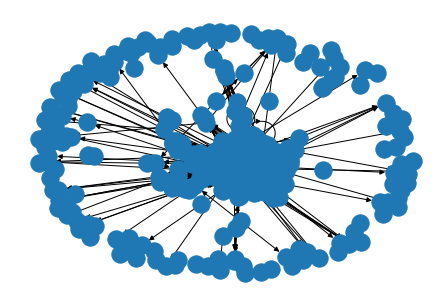

In [ ]:
nx.draw(WG)

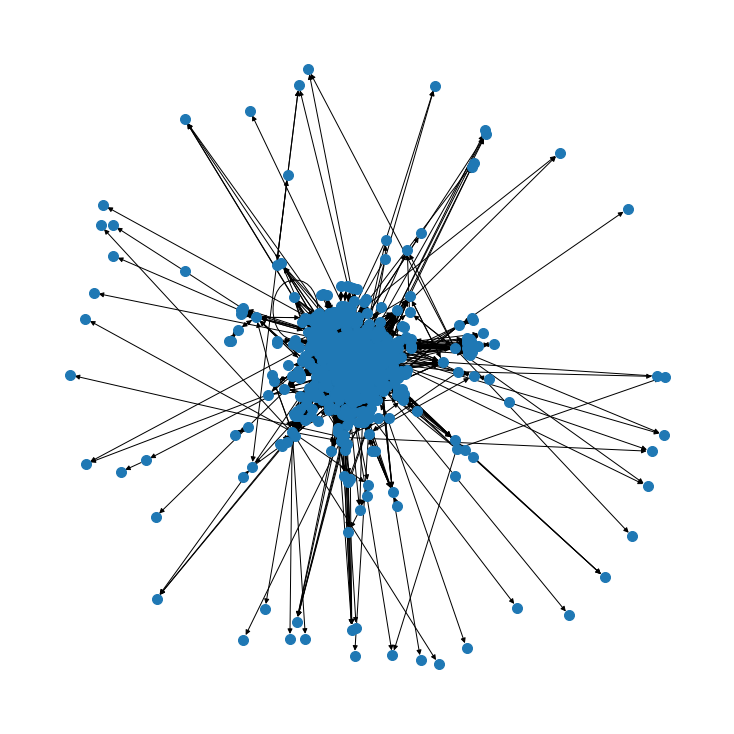

In [ ]:
Gcc = sorted(nx.weakly_connected_components(WG), key=len, reverse=True)
G0 = WG.subgraph(Gcc[0])
plt.figure(figsize=(10,10))
nx.draw(G0, node_size=100)

In [ ]:
G0.number_of_edges()

2676

In [ ]:
from fa2 import ForceAtlas2
import plotly.graph_objects as go

In [ ]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G0, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:14<00:00, 136.56it/s]BarnesHut Approximation  took  3.49  seconds
Repulsion forces  took  9.75  seconds
Gravitational forces  took  0.08  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.43  seconds



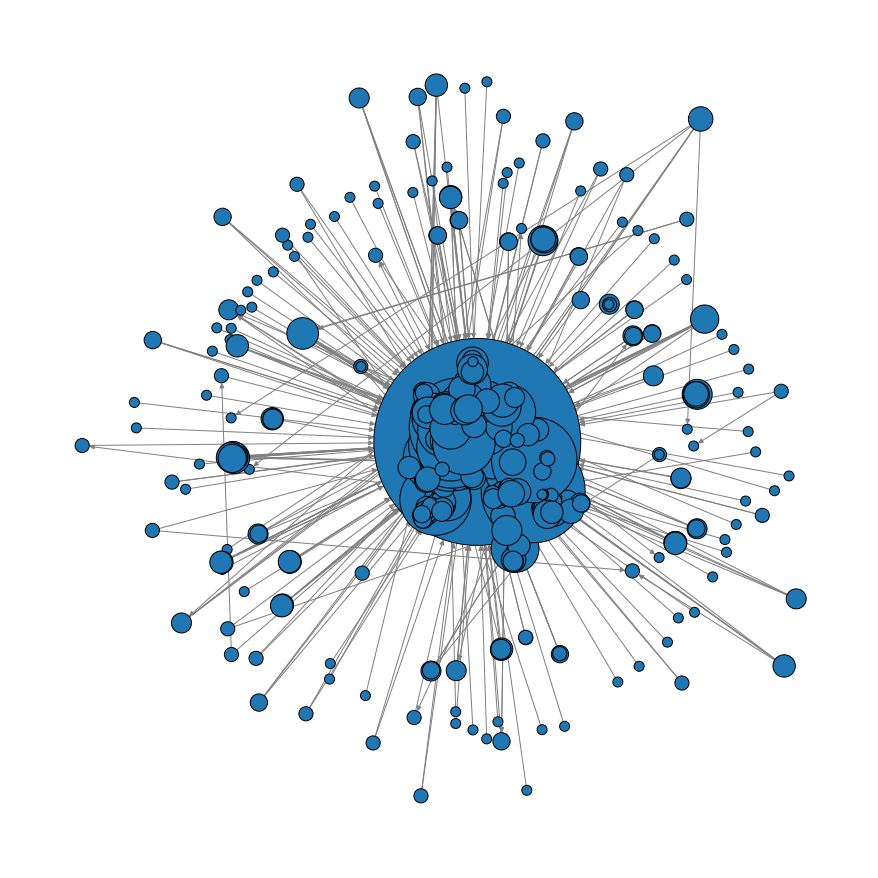

In [ ]:
d = dict(G0.degree())

plt.figure(figsize=(12,12))

nx.draw(G0, positions, node_size=[v * 100 for v in d.values()], edge_color = 'grey') #Set size according to degree
        #node_color = nx.get_node_attributes(G0, 'color').values(), \ #Set node color according to color attribute
        #edge_color = 'grey') #Set edge color to grey to better focus on nodes and not disturb the view
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") #Ensure that the nodes have black edges

In [ ]:
pos = nx.spring_layout(G0)

In [ ]:
pos

{'Innkeeper': array([ 0.06368925, -0.10526838]),
 'The Witcher journal character entries': array([-0.11233827,  0.12145629]),
 'Abigail': array([-0.13124985,  0.03691745]),
 'Adalbert (soldier)': array([-0.09336701,  0.04652224]),
 'Adam (Murky Waters)': array([-0.0897532 ,  0.11069059]),
 'Adda the White': array([-0.1069971 , -0.03236736]),
 'Alina': array([-0.07993824,  0.12197427]),
 'Alvin': array([-0.10470025,  0.05802311]),
 'Angus': array([-0.06343547,  0.11251759]),
 'Antoinette': array([ 0.03071085, -0.00635749]),
 'Armorer': array([0.00218402, 0.06310172]),
 'Azar Javed': array([-0.08760432,  0.10895771]),
 'Berengar': array([0.03006604, 0.28791821]),
 'Blacksmith': array([-0.07335174, -0.03793827]),
 "Blacksmith's son": array([ 0.00500455, -0.08482324]),
 "Blacksmith's wife": array([-0.0770499 , -0.03597446]),
 'Blue-eyed lass': array([ 0.09588329, -0.04298765]),
 'Bogut Kuternoga': array([ 0.09023932, -0.76950514]),
 'Boholt': array([-0.04239063,  0.03226283]),
 'Bootblack 

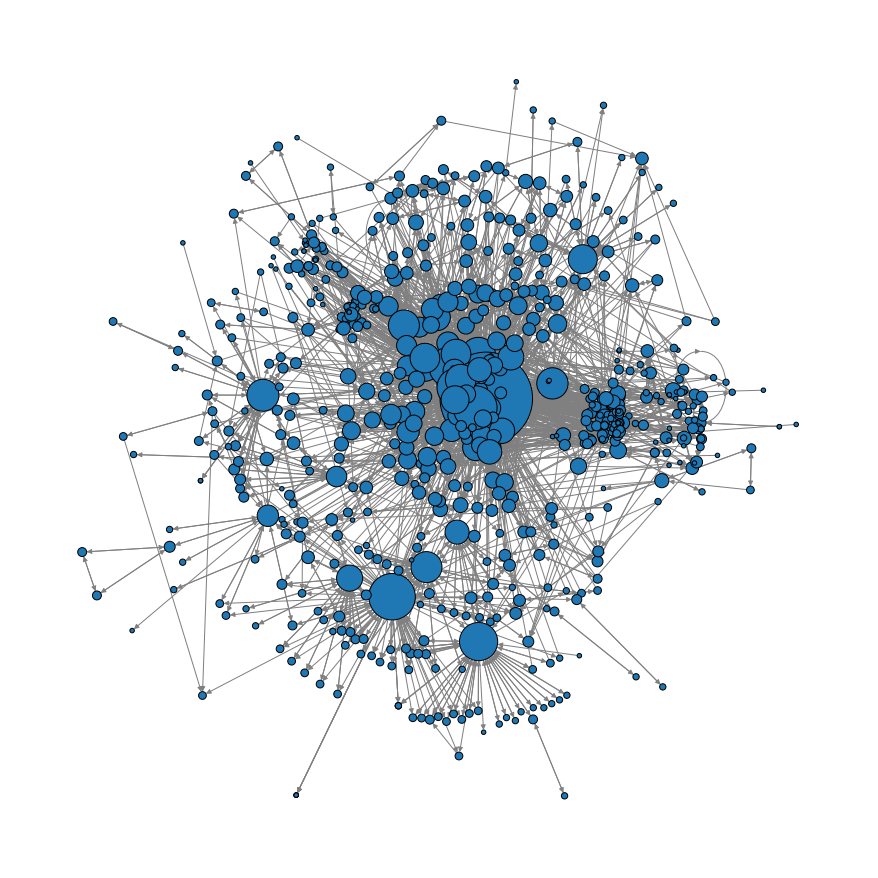

In [ ]:
plt.figure(figsize=(12,12))
nx.draw_kamada_kawai(G0, node_size=[v * 20 for v in d.values()], edge_color = 'grey')
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") #Ensure that the nodes have black edges
#plt.savefig('Graph_pic_1.png')

In [ ]:
G = nx.random_geometric_graph(200, 0.125)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G0.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.marker.size = node_adjacencies
node_trace.text = node_text

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
G0

In [ ]:
import pickle
with open("WG.pickle", 'wb') as f:
    pickle.dump(WG, f)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>